### Importing libraries

In [1]:
import kagglehub
import os
import zipfile
import shutil
import numpy as np
import pandas as pd
import pickle
os.getcwd()

'/content'

### Download data from Kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kishoreb4","key":"18834cb2002ecde825d7be1cc82ac643"}'}

In [ ]:
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small



Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): MIT


In [ ]:
with zipfile.ZipFile("fashion-product-images-small.zip", 'r') as zip_ref:
  zip_ref.extractall("fashion_data")

print(os.listdir("fashion_data"))


['myntradataset', 'images', 'styles.csv']


In [ ]:
len(os.listdir('/content/fashion_data/images'))

44441

In [ ]:
print(f"There are {len(os.listdir('/content/fashion_data/myntradataset/images'))} images in the dataset")



There are 44441 images in the dataset


In [ ]:
print(f"The size of the dataset is:\n")
!du -sh fashion_data/myntradataset/

The size of the dataset is:

634M	fashion_data/myntradataset/


### Saving the dataset in my google drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
shutil.copytree("fashion_data/myntradataset", "/content/drive/MyDrive/MLBD/Project/data/", dirs_exist_ok=True)


'/content/drive/MyDrive/MLBD/Project/data/'

### Data related to products and basic EDA

In [ ]:
styles_df = pd.read_csv("/content/drive/MyDrive/MLBD/Project/data/styles.csv", on_bad_lines='skip')

In [ ]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
styles_df[(styles_df['subCategory']=="Bags") & (styles_df['articleType']=="Wallets")].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6191,7085,Women,Accessories,Bags,Wallets,Pink,Winter,2015.0,Casual,Wildcraft Women Pink Printed Wallet
29409,7086,Women,Accessories,Bags,Wallets,Blue,Winter,2015.0,Casual,Wildcraft Women Blue Printed Wallet


In [ ]:
styles_df[(styles_df['subCategory']=="Free Gifts") & (styles_df['articleType']=="Wallets")].head()
styles_df[(styles_df['subCategory']=="Wallets") & (styles_df['articleType']=="Wallets")].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
111,41268,Men,Accessories,Wallets,Wallets,Black,Summer,2012.0,Casual,Arrow Men Black Wallet
113,14856,Women,Accessories,Wallets,Wallets,Beige,Summer,2011.0,Casual,United Colors of Benetton Women Solid Beige Wa...
237,33445,Women,Accessories,Wallets,Wallets,Black,Summer,2012.0,Casual,Baggit Women Lamboo Mayur Black Wallet
279,14869,Men,Accessories,Wallets,Wallets,Black,Summer,2011.0,Casual,United Colors of Benetton Men Solid Black Wallets
330,17086,Women,Accessories,Wallets,Wallets,Orange,Winter,2015.0,Casual,Lino Perros Women Blue Zip Orange Wallet


In [ ]:
styles_df[styles_df['articleType']=="Wallets"]['subCategory'].unique()

array(['Wallets', 'Bags', 'Free Gifts'], dtype=object)

In [ ]:
#Check if there are articleType in more than one subcategoryies
styles_df.groupby(['articleType']).agg({'subCategory': 'nunique'}).sort_values(by='subCategory', ascending=False)

,subCategory
articleType,
Wallets,3
Body Lotion,2
Backpacks,2
Shorts,2
Travel Accessory,2
...,...
Tunics,1
Waistcoat,1
Waist Pouch,1


In [ ]:
print(f"There are {styles_df['id'].nunique()} unique products in the dataset")
print(f"There are {styles_df['masterCategory'].nunique()} unique categories in the dataset")
print(f"There are {styles_df['subCategory'].nunique()} unique subcategories in the dataset")
print(f"There are {styles_df['articleType'].nunique()} unique article types in the dataset")
print(f"There are {styles_df['baseColour'].nunique()} unique colours in the dataset")

There are 44424 unique products in the dataset
There are 7 unique categories in the dataset
There are 45 unique subcategories in the dataset
There are 143 unique article types in the dataset
There are 46 unique colours in the dataset


In [ ]:
styles_df[styles_df["subCategory"]=="Watches"]['articleType'].value_counts()[:10]

,count
articleType,
Watches,2542


In [ ]:
styles_df[styles_df["subCategory"]=="Bottomwear"]['articleType'].value_counts()[:10]

,count
articleType,
Jeans,609
Shorts,545
Trousers,530
Track Pants,304
Leggings,177
Capris,175
Skirts,128
Patiala,38
Jeggings,34


In [ ]:
styles_df[styles_df["subCategory"]=="Topwear"]['articleType'].value_counts()[:10]

,count
articleType,
Tshirts,7066
Shirts,3217
Kurtas,1844
Tops,1762
Sweatshirts,285
Sweaters,277
Jackets,258
Kurtis,234
Tunics,229


### Creating mapping dict

In [ ]:
# Creating a dict of id and articletype
# mapping_dict = dict(styles_df.set_index('id')['articleType'])
mapping_dict = {str(k): v for k, v in styles_df.set_index('id')['articleType'].items()}



In [ ]:
mapping_dict['10007']

'Tshirts'

In [ ]:
mapping_dict.get('10007','None')

'Tshirts'

In [ ]:
type(mapping_dict.values())

dict_values

In [ ]:
len([v for v in mapping_dict.values() if v == 'Tshirts'])


7067

In [ ]:
with open(os.path.join("/content/drive/MyDrive/MLBD/Project/data/artifacts/", 'mapping_dict.pkl'), 'wb') as f:
        pickle.dump(mapping_dict, f)

### Generating and saving embeddings

### Model building

2

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import defaultdict
import random
import networkx as nx
from PIL import Image
import torch
from torchvision import models, transforms
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity



In [25]:

class VisualProductRecommender:
  def __init__(self, img_dir, embedding_dim=512, n_clusters=100, n_hash_tables=5, hash_size=10, seed=143):
    self.seed = seed
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    self.img_dir = img_dir
    self.embedding_dim = embedding_dim
    self.product_embeddings = {}
    self.product_metadata = defaultdict(dict)
    self.product_ids = []
    self.n_clusters = n_clusters
    self.n_hash_tables = n_hash_tables
    self.hash_size = hash_size

    # ResNet50 model initialisation
    resnet = models.resnet18(pretrained=True)
    self.feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])
    self.feature_extractor.eval()
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.feature_extractor.to(self.device)

    # Image transform
    self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    # LSH components
    self.hash_tables = [defaultdict(list) for _ in range(n_hash_tables)]
    self.random_planes = [np.random.randn(embedding_dim, hash_size) for _ in range(n_hash_tables)]

    # Clustering
    self.cluster_model = KMeans(n_clusters=n_clusters, random_state=143)
    self.product_clusters = {}

    # Graph
    self.product_graph = None
    self.pagerank_scores = {}
    self.cluster_pagerank = {}

  def _save_artifacts(self, save_dir="/content/drive/MyDrive/MLBD/Project/data/artifacts/"):
      os.makedirs(save_dir, exist_ok=True)

      with open(os.path.join(save_dir, 'random_planes.pkl'), 'wb') as f:
          pickle.dump(self.random_planes, f)

      with open(os.path.join(save_dir, 'hash_tables.pkl'), 'wb') as f:
          pickle.dump(self.hash_tables, f)

      with open(os.path.join(save_dir, 'product_embeddings.pkl'), 'wb') as f:
          pickle.dump(self.product_embeddings, f)

      with open(os.path.join(save_dir, 'product_metadata.pkl'), 'wb') as f:
          pickle.dump(self.product_metadata, f)

      with open(os.path.join(save_dir, 'product_clusters.pkl'), 'wb') as f:
          pickle.dump(self.product_clusters, f)

      with open(os.path.join(save_dir, 'pagerank_scores.pkl'), 'wb') as f:
          pickle.dump(self.pagerank_scores, f)

      with open(os.path.join(save_dir, 'cluster_pagerank.pkl'), 'wb') as f:
          pickle.dump(self.cluster_pagerank, f)

      print("Artifacts saved.")

  def _load_artifacts(self, save_dir="/content/drive/MyDrive/MLBD/Project/data/artifacts/"):
      with open(os.path.join(save_dir, 'random_planes.pkl'), 'rb') as f:
          self.random_planes = pickle.load(f)

      with open(os.path.join(save_dir, 'combined_hash_tables.pkl'), 'rb') as f:
          self.hash_tables = pickle.load(f)

      with open(os.path.join(save_dir, 'combined_embeddings.pkl'), 'rb') as f:
          self.product_embeddings = pickle.load(f)
          self.product_ids = list(self.product_embeddings.keys())

      with open(os.path.join(save_dir, 'combined_product_metadata.pkl'), 'rb') as f:
          self.product_metadata = pickle.load(f)

      with open(os.path.join(save_dir, 'product_clusters.pkl'), 'rb') as f:
          self.product_clusters = pickle.load(f)

      with open(os.path.join(save_dir, 'pagerank_scores.pkl'), 'rb') as f:
          self.pagerank_scores = pickle.load(f)

      with open(os.path.join(save_dir, 'cluster_pagerank.pkl'), 'rb') as f:
          self.cluster_pagerank = pickle.load(f)

      with open(os.path.join(save_dir, 'mapping_dict.pkl'), 'rb') as f:
        global mapping_dict
        mapping_dict = pickle.load(f)

      print("Artifacts loaded.")

  def load_and_process_images(self):
        print("Processing images and extracting features...")

        image_files = [f for f in os.listdir(self.img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Taking a sample of first 10 images
        # image_files = image_files[:10]

        for filename in tqdm(image_files, desc="Extracting features"):
            product_id = os.path.splitext(filename)[0]
            self.product_ids.append(product_id)
            img_path = os.path.join(self.img_dir, filename)

            # Load image and preprocess
            img = Image.open(img_path).convert("RGB")
            img_tensor = self.transform(img).unsqueeze(0).to(self.device)

            with torch.no_grad():
                features = self.feature_extractor(img_tensor).squeeze().cpu().numpy()
            features = features / np.linalg.norm(features)
            self.product_embeddings[product_id] = features
            self.product_metadata[product_id] = {
                'filename': filename,
                'path': img_path,
                'category': mapping_dict.get(product_id)
            }

        print(f"Processed {len(self.product_ids)} images total.")

        self._build_lsh_tables()
        self._cluster_products()
        self._build_product_graph()
        self._compute_pagerank()
        self._save_artifacts()

  def _build_lsh_tables(self):
    """

    """
    print("Building LSH tables...")
    for pid in self.product_ids:
        emb = self.product_embeddings[pid]
        for i in range(self.n_hash_tables):
            projections = np.dot(emb, self.random_planes[i])
            hash_code = ''.join(['1' if x > 0 else '0' for x in projections])
            self.hash_tables[i][hash_code].append(pid)
    print("LSH tables are built")
    print(f"Below are the final hask tables: {self.hash_tables}")

  def _cluster_products(self):
        print("Clustering products...")
        embeddings = np.array([self.product_embeddings[pid] for pid in self.product_ids])
        cluster_labels = self.cluster_model.fit_predict(embeddings)
        for i, pid in enumerate(self.product_ids):
            self.product_clusters[pid] = cluster_labels[i]
            self.product_metadata[pid]['cluster'] = int(cluster_labels[i])

  def _build_product_graph(self):
        print("Building product graph...")
        G = nx.DiGraph()
        for pid in self.product_ids:
            G.add_node(pid, embedding=self.product_embeddings[pid])

        for pid1 in self.product_ids:
            cluster = self.product_clusters[pid1]
            candidates = [pid for pid in self.product_ids if self.product_clusters[pid] == cluster and pid != pid1]
            for pid2 in random.sample(candidates, min(5, len(candidates))):
                sim = cosine_similarity([self.product_embeddings[pid1]], [self.product_embeddings[pid2]])[0][0]
                if sim > 0.5:
                    G.add_edge(pid1, pid2, weight=sim)

        self.product_graph = G
        print("Product graph is built")
        # self._visualize_product_graph(self.product_graph, num_nodes=10)


  def _visualize_product_graph(self, product_graph, num_nodes=10):
      """
      Visualize a subgraph of the product graph with up to `num_nodes` nodes.
      """
      print(f"Visualizing a subgraph with up to {num_nodes} nodes...")

      # Extract a subgraph with the first `num_nodes` nodes (for clarity)
      nodes_subset = list(product_graph.nodes)[:num_nodes]
      subgraph = product_graph.subgraph(nodes_subset)

      pos = nx.spring_layout(subgraph, seed=42)  # Layout algorithm
      edge_weights = [subgraph[u][v]['weight'] for u, v in subgraph.edges]

      plt.figure(figsize=(12, 8))
      nx.draw_networkx_nodes(subgraph, pos, node_size=300, node_color='skyblue', alpha=0.9)
      nx.draw_networkx_edges(subgraph, pos, width=edge_weights, alpha=0.5)
      nx.draw_networkx_labels(subgraph, pos, font_size=10)

      plt.title("Product Similarity Graph (Subgraph)")
      plt.axis('off')
      plt.show()

  def _compute_pagerank(self):

        print("Computing PageRank scores...")
        self.pagerank_scores = nx.pagerank(self.product_graph, alpha=0.85)

        for cluster_id in range(self.n_clusters):
            personalization = {}
            for pid in self.product_ids:
                personalization[pid] = 1.0 if self.product_clusters[pid] == cluster_id else 0.1

            total = sum(personalization.values())
            personalization = {k: v / total for k, v in personalization.items()}
            self.cluster_pagerank[cluster_id] = nx.pagerank(self.product_graph, alpha=0.85, personalization=personalization)

  def find_similar_via_lsh(self, query_pid, k=5):
        if query_pid not in self.product_embeddings:
            return []

        emb = self.product_embeddings[query_pid]
        candidates = set()

        for i in range(self.n_hash_tables):
            projections = np.dot(emb, self.random_planes[i])
            hash_code = ''.join(['1' if x > 0 else '0' for x in projections])
            bucket = self.hash_tables[i].get(hash_code, [])
            candidates.update(pid for pid in bucket if pid != query_pid)

        # if len(candidates) < k:
        #     cluster = self.product_clusters[query_pid]
        #     fallback = [pid for pid in self.product_ids if self.product_clusters[pid] == cluster and pid != query_pid]
        #     candidates.update(random.sample(fallback, min(k - len(candidates), len(fallback))))

        similarities = []
        for cid in candidates:
            sim = cosine_similarity([emb], [self.product_embeddings[cid]])[0][0]
            similarities.append((cid, sim))

        similarities.sort(key=lambda x: x[1], reverse=True)
        results = []
        for pid, sim in similarities[:k]:
            results.append({
                'product_id': pid,
                'similarity': sim,
                # 'pagerank': self.pagerank_scores[pid],
                'metadata': self.product_metadata[pid]
            })

        return results

  def setup_for_inference(self, artifact_path="/content/drive/MyDrive/MLBD/Project/data/artifacts/"):
      self._load_artifacts(artifact_path)

  def get_recommendations(self, query_pid, k=5, use_topic_pagerank=True):
            if query_pid not in self.product_embeddings:
                return []

            candidates = self.find_similar_via_lsh(query_pid, k=k*2)
            # cluster = self.product_clusters[query_pid]
            # pagerank_dict = self.cluster_pagerank[cluster] if use_topic_pagerank else self.pagerank_scores

            for item in candidates:
                pid = item['product_id']
                score = 1 * item['similarity']
                # + 0.3 * pagerank_dict[pid]
                item['combined_score'] = score

            candidates.sort(key=lambda x: x['combined_score'], reverse=True)
            return candidates[:k]

  def metrics(self, query_id, recommendations):
    query_category = mapping_dict.get(query_id)
    rec_categories = [mapping_dict.get(rec['product_id']) for rec in recommendations]
    precision = sum(1 for rec in recommendations if mapping_dict.get(rec['product_id']) == query_category) / len(recommendations)
    # recall = sum(1 for rec in recommendations if mapping_dict.get(rec['product_id']) == query_category) / len([v for v in mapping_dict.values() if v == query_category])
    recall = 1 if any(mapping_dict.get(rec['product_id']) == query_category for rec in recommendations) else 0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
    return precision, recall, f1_score


  def visualize_recommendations(self, query_pid, recommendations):
        precision, recall, f1 = self.metrics(query_pid, recommendations)
        print(f"\nEvaluation Metrics:")
        print(f"Precision: {precision:.2f}")
        print(f"Recall:    {recall:.2f}")
        print(f"F1 Score:  {f1:.2f}\n")
        n = len(recommendations) + 1
        fig, axes = plt.subplots(1, n, figsize=(n * 4, 5))
        query_img = Image.open(self.product_metadata[query_pid]['path'])
        axes[0].imshow(query_img)
        # axes[0].set_title(f"Query\n{query_pid}\nCluster: {self.product_clusters[query_pid]}")
        axes[0].set_title(f"Query\n{query_pid}\n{self.product_metadata[query_pid]['category']}")
        axes[0].axis('off')

        for i, rec in enumerate(recommendations):
            img = Image.open(rec['metadata']['path'])
            axes[i+1].imshow(img)
            axes[i+1].set_title(f"Recc\n{rec['product_id']}\nSim: {rec['similarity']:.2f}")
            # axes[i+1].set_title(f"Recc\n{rec['product_id']}\nSim: {rec['similarity']:.2f}\nPR: {rec['pagerank']:.2f}")
            axes[i+1].axis('off')

        plt.tight_layout()
        plt.show()



In [26]:
data_dir = "/content/drive/MyDrive/MLBD/Project/data/images/"

In [27]:
recommender = VisualProductRecommender(data_dir)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# recommender.load_and_process_images()

Processing images and extracting features...


Extracting features:  87%|████████▋ | 38579/44441 [3:32:08<35:47,  2.73it/s]

In [ ]:
1

1

### Inference

In [48]:
# os.listdir("/content/drive/MyDrive/MLBD/Project/data/artifacts")

In [ ]:
data_dir = "/content/drive/MyDrive/MLBD/Project/data/images/"

In [ ]:
recommender = VisualProductRecommender(data_dir)

In [28]:
recommender.setup_for_inference(artifact_path = "/content/drive/MyDrive/MLBD/Project/data/artifacts")

Artifacts loaded.


### Recommending for one product

In [29]:
results = recommender.get_recommendations(query_pid='8808', k=5)


In [39]:
recommender.metrics('8808',results)

(1.0, 1, 1.0)

In [34]:
results_bags = recommender.get_recommendations(query_pid='10017', k=5)

In [35]:
results_bags

[{'product_id': '9531',
  'similarity': np.float32(0.853439),
  'metadata': {'filename': '9531.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/9531.jpg',
   'category': 'Jackets',
   'cluster': 4},
  'combined_score': np.float32(0.853439)},
 {'product_id': '10777',
  'similarity': np.float32(0.85228133),
  'metadata': {'filename': '10777.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/10777.jpg',
   'category': 'Jackets',
   'cluster': 84},
  'combined_score': np.float32(0.85228133)},
 {'product_id': '3211',
  'similarity': np.float32(0.85079515),
  'metadata': {'filename': '3211.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/3211.jpg',
   'category': 'Tshirts',
   'cluster': 22},
  'combined_score': np.float32(0.85079515)},
 {'product_id': '17900',
  'similarity': np.float32(0.8478404),
  'metadata': {'filename': '17900.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/17900.jpg',
   'category': 'Jackets',
   'clus

In [12]:
mapping_dict['8808']

'Shirts'

In [30]:
results

[{'product_id': '7174',
  'similarity': np.float32(1.0000002),
  'metadata': {'filename': '7174.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/7174.jpg',
   'category': 'Shirts',
   'cluster': 97},
  'combined_score': np.float32(1.0000002)},
 {'product_id': '9588',
  'similarity': np.float32(0.96326935),
  'metadata': {'filename': '9588.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/9588.jpg',
   'category': 'Shirts',
   'cluster': 97},
  'combined_score': np.float32(0.96326935)},
 {'product_id': '9619',
  'similarity': np.float32(0.96173877),
  'metadata': {'filename': '9619.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/9619.jpg',
   'category': 'Shirts',
   'cluster': 97},
  'combined_score': np.float32(0.96173877)},
 {'product_id': '8727',
  'similarity': np.float32(0.96173877),
  'metadata': {'filename': '8727.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/8727.jpg',
   'category': 'Shirts',
   'cluster': 

In [14]:
# Image.open("/content/drive/MyDrive/MLBD/Project/data/images/8808.jpg")
# with open(os.path.join("/content/drive/MyDrive/MLBD/Project/data/artifacts/", 'combined_product_metadata.pkl'), 'rb') as f:
#   product_metadata = pickle.load(f)

In [33]:
# product_metadata['10017']

{'filename': '10017.jpg',
 'path': '/content/drive/MyDrive/MLBD/Project/data/images/10017.jpg',
 'category': 'Jackets',
 'cluster': 84}


Evaluation Metrics:
Precision: 1.00
Recall:    1.00
F1 Score:  1.00



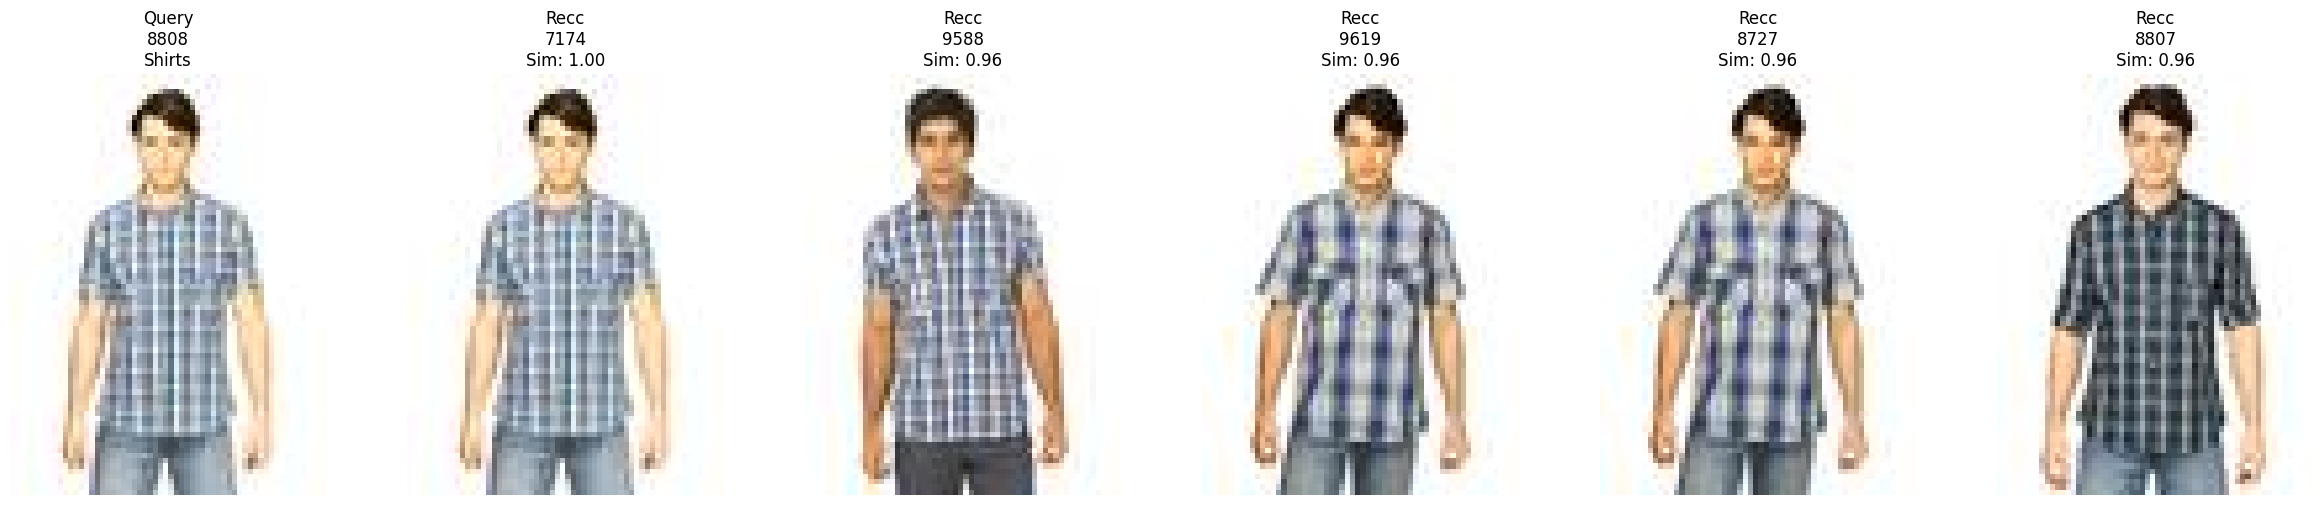

In [31]:
recommender.visualize_recommendations('8808', results)


Evaluation Metrics:
Precision: 0.60
Recall:    1.00
F1 Score:  0.75



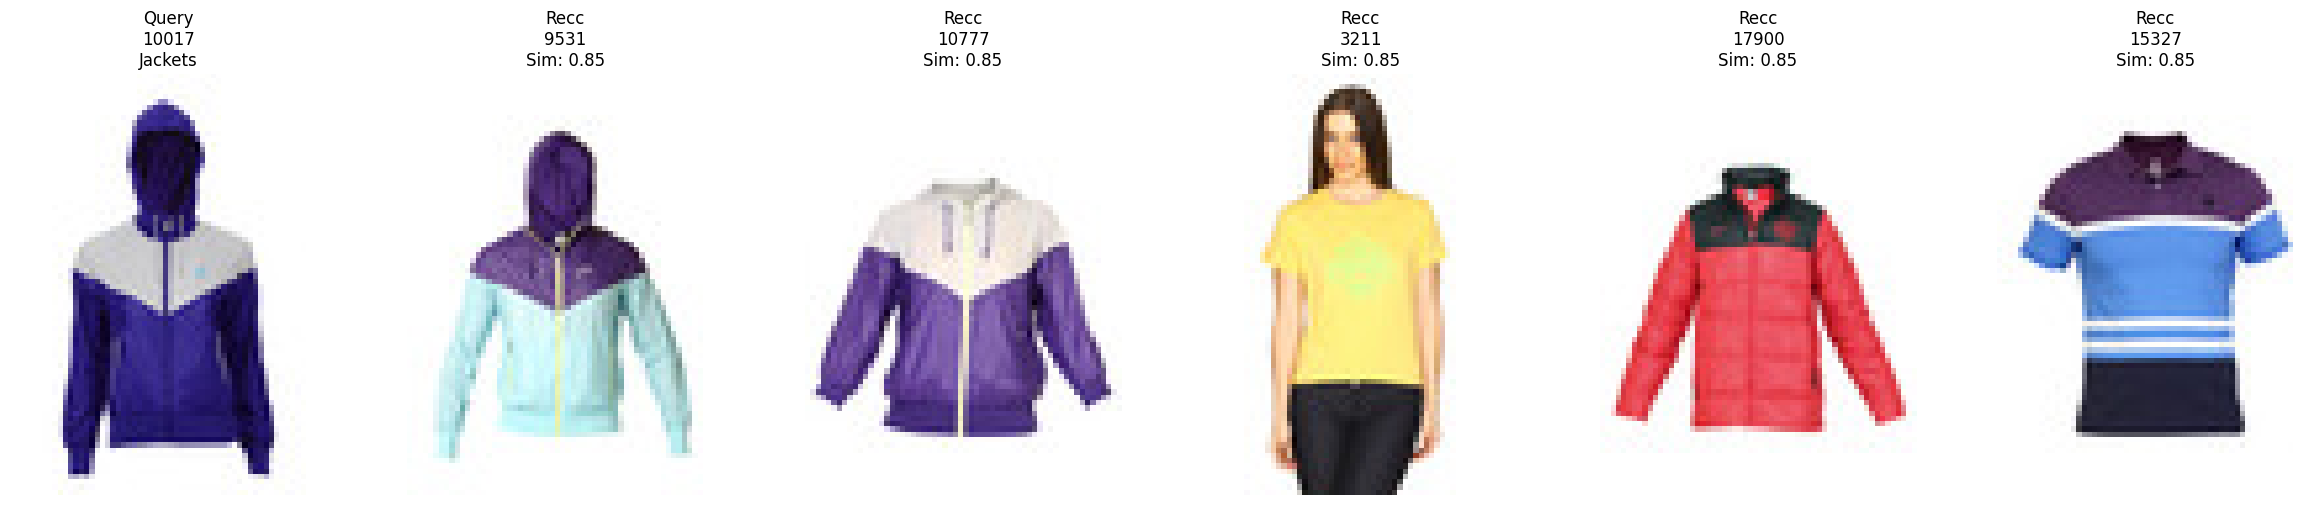

In [37]:
recommender.visualize_recommendations('10017', results_bags)

In [ ]:
9


### Calculate precision and recall over 200 images

In [47]:
with open("/content/drive/MyDrive/MLBD/Project/data/artifacts/combined_embeddings.pkl", "rb") as f:
  combined_embeddings = pickle.load(f)

all_product_ids = list(combined_embeddings.keys())

# Select 200 random product_ids
sampled_ids = random.sample(all_product_ids, 200)

precision_scores = []
recall_scores = []
f1_scores = []
for each_product_id in sampled_ids:
  results = recommender.get_recommendations(query_pid=each_product_id, k=5)
  precision, recall, f1 = recommender.metrics(each_product_id, results)
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)

print(f"Average Precision: {np.mean(precision_scores):.2f}")
print(f"Average Recall: {np.mean(recall_scores):.2f}")
print(f"Average F1 Score: {np.mean(f1_scores):.2f}")


Average Precision: 0.74
Average Recall: 0.91
Average F1 Score: 0.79


In [ ]:
# image_files = [f for f in os.listdir(data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
# image_files = image_files[:10]


In [ ]:
# os.path.splitext(image_files[0])[0]


'8808'

In [ ]:
# recommender.product_ids

In [ ]:
# os.listdir(data_dir)

In [ ]:
# print(len(recommender.product_ids))

10


In [ ]:
# query_id = recommender.product_ids[0]
# query_id

'8808'

In [ ]:
# recs = recommender.get_recommendations(query_id, k=5)

In [ ]:
# recs

[{'product_id': '8277',
  'similarity': np.float32(0.84722424),
  'pagerank': 0.09999999999999999,
  'metadata': {'filename': '8277.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/8277.jpg',
   'category': 'Tshirts',
   'cluster': 9},
  'combined_score': np.float32(0.6088464)},
 {'product_id': '9155',
  'similarity': np.float32(0.8194322),
  'pagerank': 0.09999999999999999,
  'metadata': {'filename': '9155.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/9155.jpg',
   'category': 'Tops',
   'cluster': 1},
  'combined_score': np.float32(0.589392)},
 {'product_id': '9095',
  'similarity': np.float32(0.7643621),
  'pagerank': 0.09999999999999999,
  'metadata': {'filename': '9095.jpg',
   'path': '/content/drive/MyDrive/MLBD/Project/data/images/9095.jpg',
   'category': 'Shorts',
   'cluster': 6},
  'combined_score': np.float32(0.5508429)},
 {'product_id': '9350',
  'similarity': np.float32(0.65115094),
  'pagerank': 0.09999999999999999,
  'metadata': {'f

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming random_planes is a list of numpy arrays of shape (512, 10)
def visualize_random_planes(random_planes):
    n_tables = len(random_planes)
    fig, axes = plt.subplots(1, n_tables, figsize=(n_tables * 4, 5))

    for i, plane in enumerate(random_planes):
        ax = axes[i] if n_tables > 1 else axes
        cax = ax.imshow(plane, aspect='auto', cmap='viridis')
        ax.set_title(f'Hash Table {i+1}\nShape: {plane.shape}')
        ax.set_xlabel('Hash Size (columns)')
        ax.set_ylabel('Embedding Dimensions (rows)')
        fig.colorbar(cax, ax=ax, shrink=0.6)

    plt.tight_layout()
    plt.show()


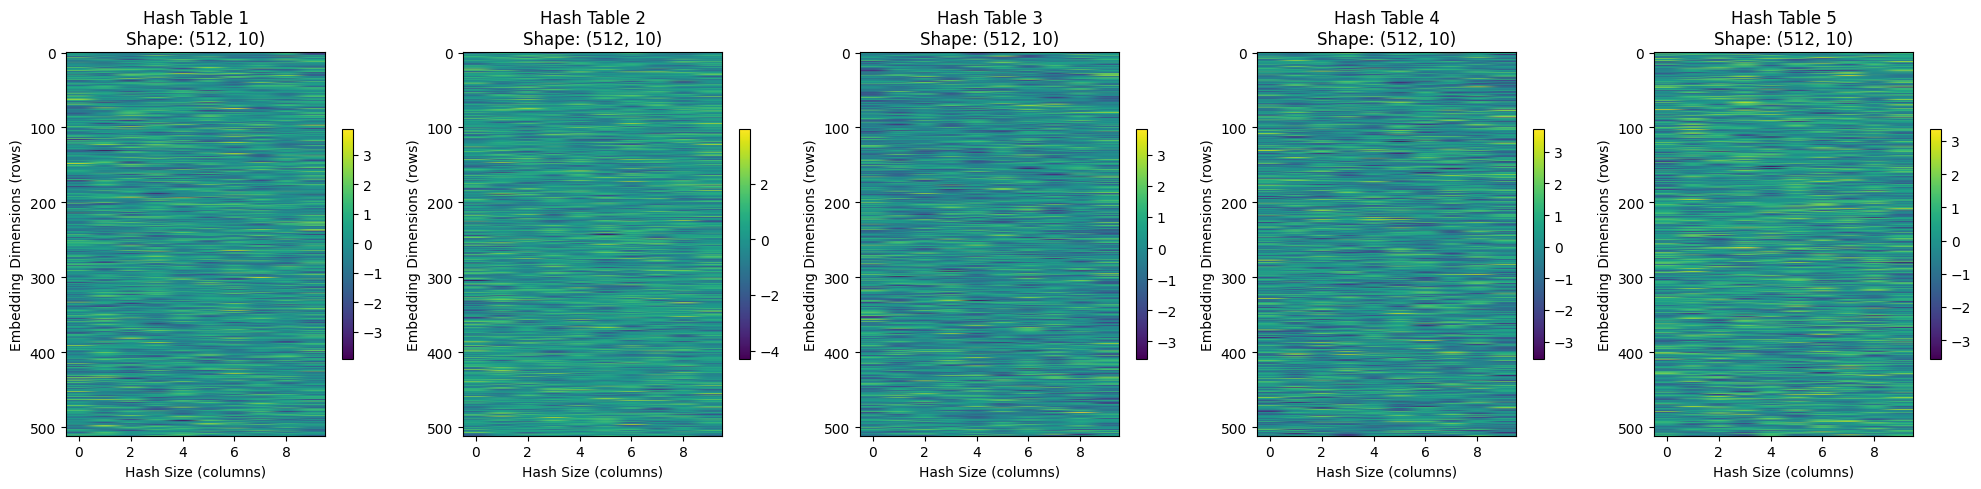

In [ ]:
visualize_random_planes(recommender.random_planes)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_embedding_lsh_process(recommender, num_products=5):
    fig, axes = plt.subplots(num_products, 4, figsize=(20, 4 * num_products))

    selected_pids = recommender.product_ids[:num_products]
    hash_table_idx = 0  # visualize using first hash table for simplicity
    plane = recommender.random_planes[hash_table_idx]  # shape: (512, 10)

    for i, pid in enumerate(selected_pids):
        emb = recommender.product_embeddings[pid]  # shape: (512,)
        projections = np.dot(emb, plane)           # shape: (10,)
        binary_code = ['1' if x > 0 else '0' for x in projections]

        # Plot embedding
        axes[i, 0].plot(emb)
        axes[i, 0].set_title(f"Embedding\n{pid}\nShape: {emb.shape}")

        # Plot random plane (as heatmap)
        im = axes[i, 1].imshow(plane, aspect='auto', cmap='coolwarm')
        axes[i, 1].set_title("Random Plane (512x10)")
        fig.colorbar(im, ax=axes[i, 1], shrink=0.5)

        # Plot projection (dot product)
        axes[i, 2].bar(range(len(projections)), projections, color='purple')
        axes[i, 2].set_title("Dot Product (Projection Vector)")

        # Plot binary hash code
        axes[i, 3].bar(range(len(binary_code)), [int(b) for b in binary_code], color='green')
        axes[i, 3].set_title(f"Hash Code: {''.join(binary_code)}")

    plt.tight_layout()
    plt.show()


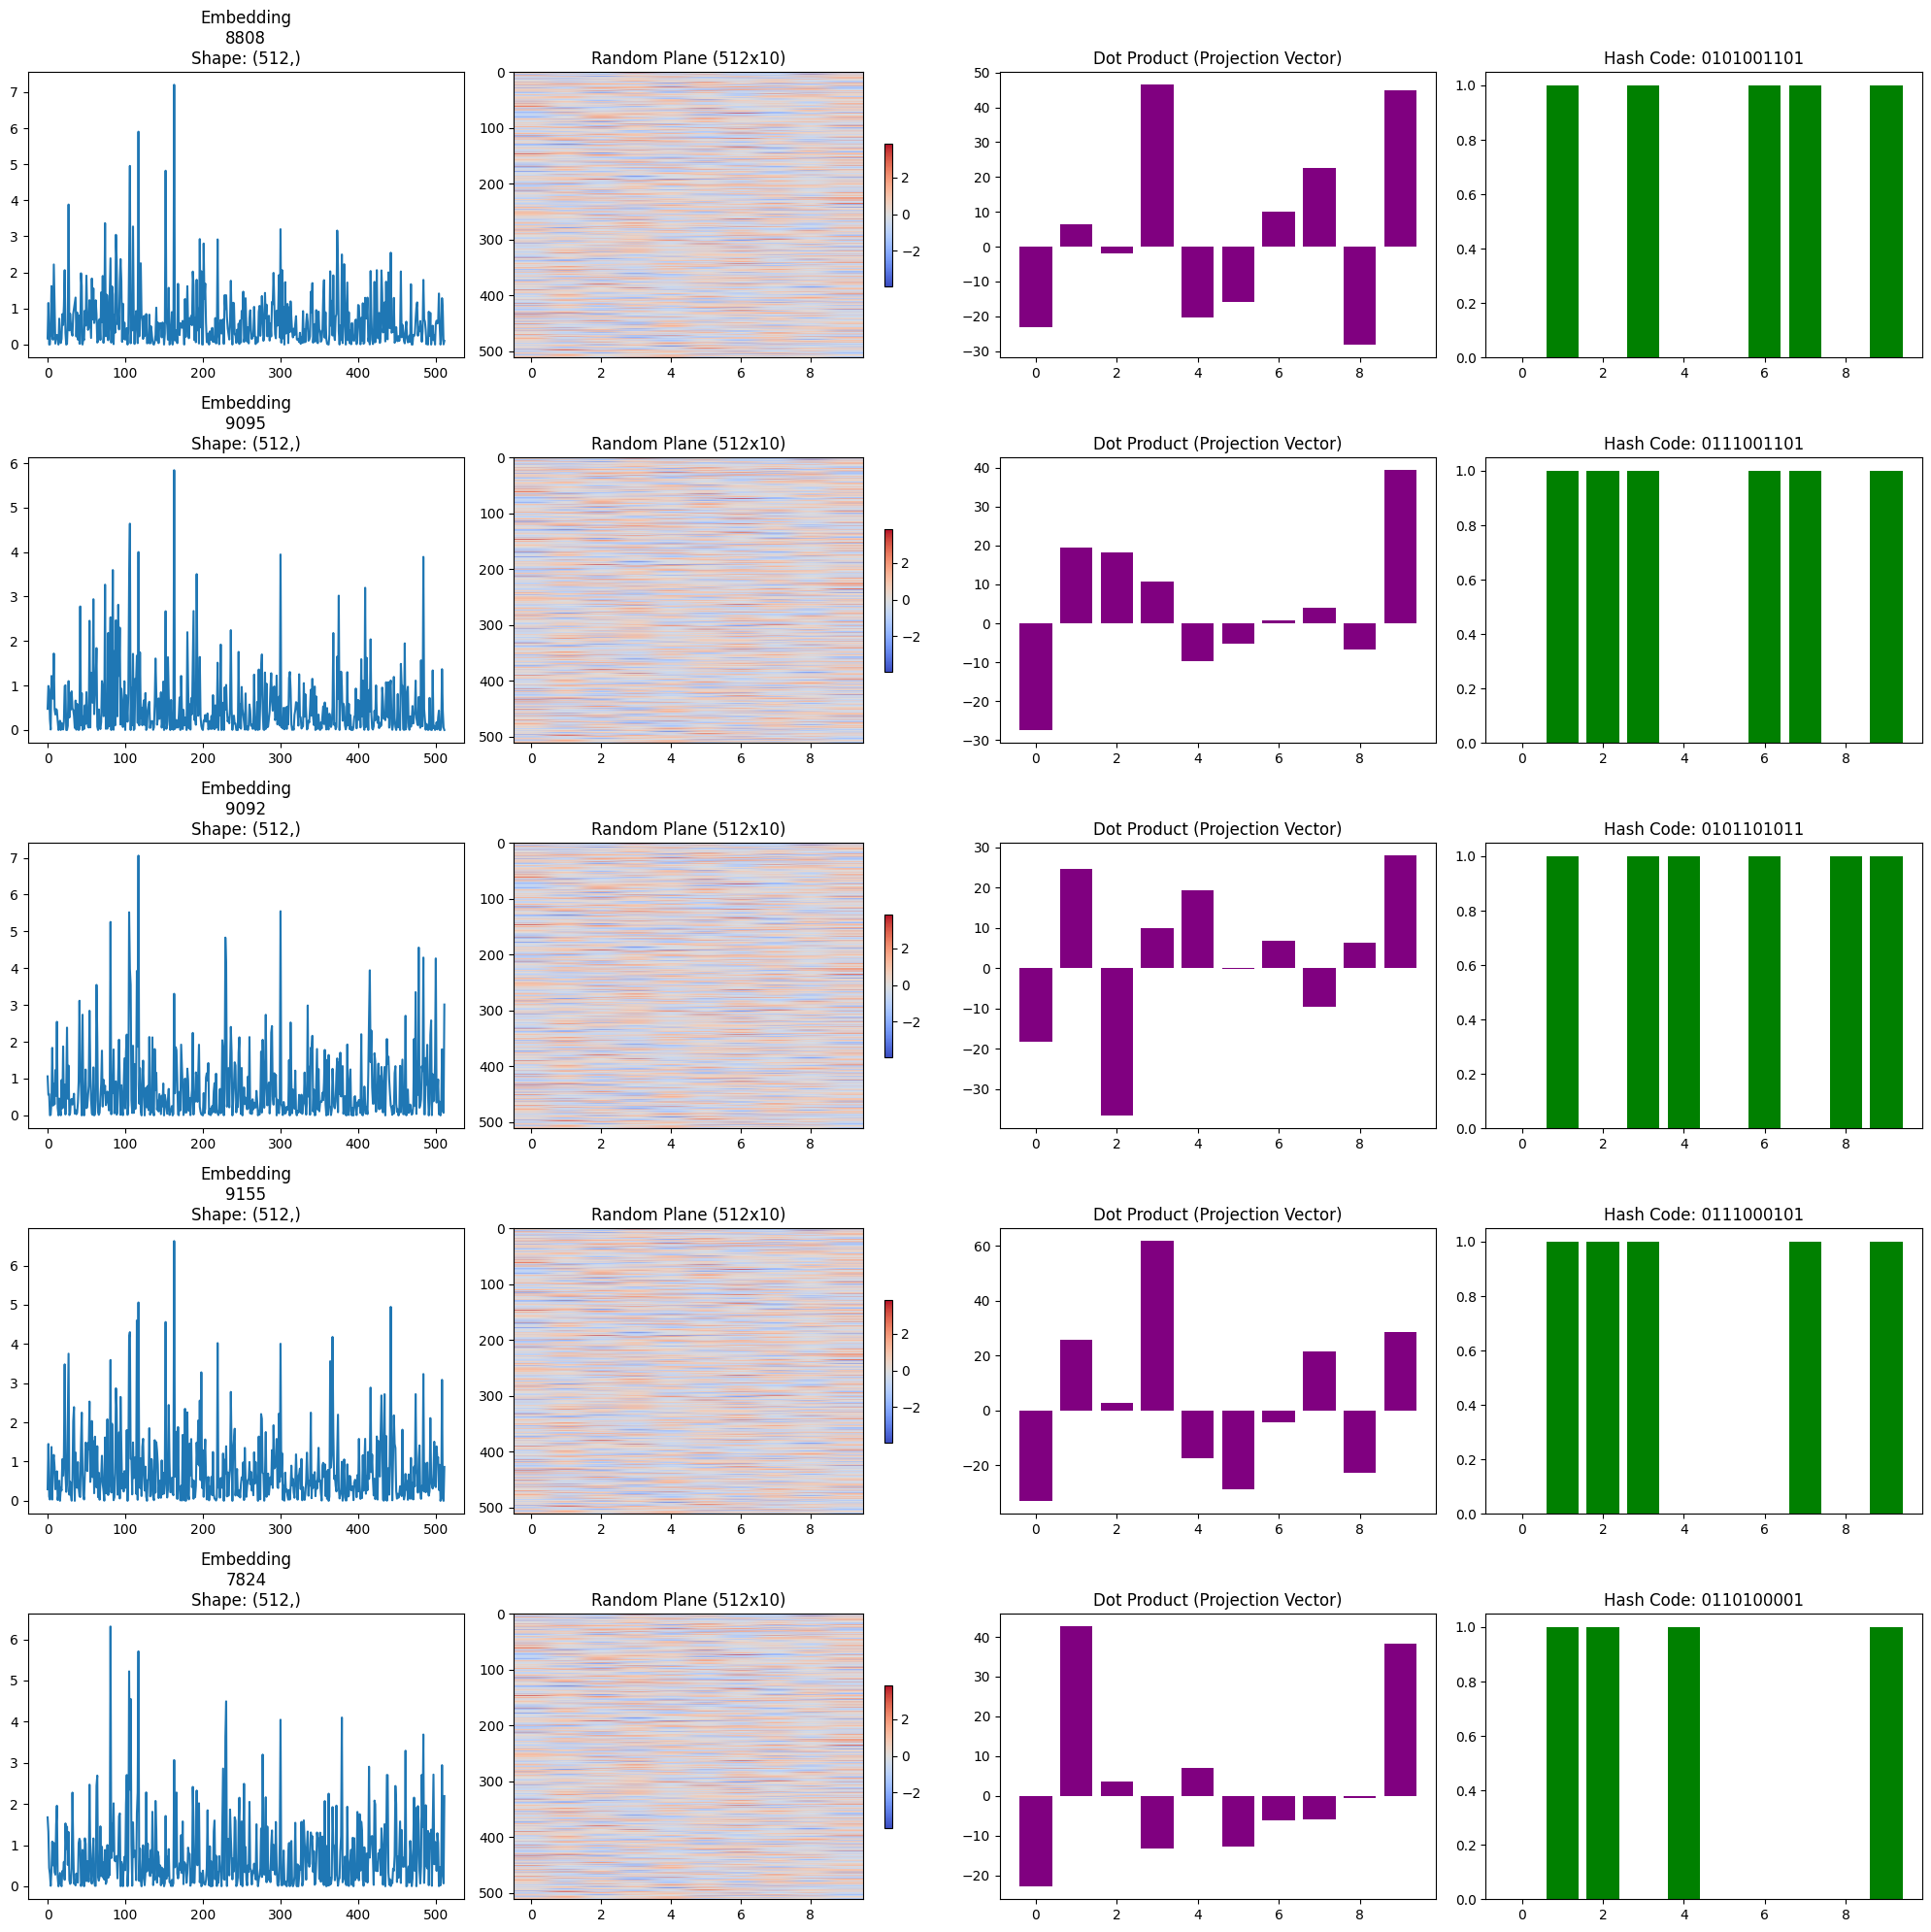

In [ ]:
visualize_embedding_lsh_process(recommender, num_products=5)


In [ ]:
d

defaultdict(list, {'apple': 1, 'orange': []})